In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline

## Question 1.  (40 pts)

This is an artificial data set. It has five features and let's explore clustering models on this data set.

In [3]:
data1=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/data1.csv")
data1.head()

,0,1,2,3,4
0,7.041668,0.679020,-8.408575,3.461746,-5.597806
1,-4.816582,-0.430385,0.753123,0.264526,3.965808
2,4.096806,-6.559957,-4.302680,-5.615232,5.635794
3,4.962203,-6.756521,-5.252219,-6.075322,2.754351
4,7.039362,0.263419,-7.505487,1.981984,-10.156349


#### 1. Visualize the data1 using PCA on a two dimensional plane and guess the number of clusters we could have from the plot. (5 pts)

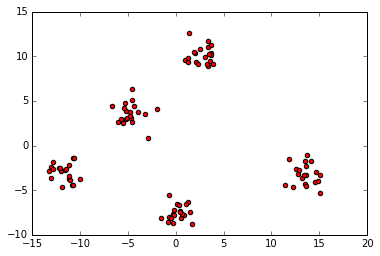

I guess that the number of clusters could be: 5


In [7]:
from sklearn.decomposition import PCA
pca=PCA(2)
Xproj=pca.fit_transform(data1)
plt.scatter(Xproj[:,0],Xproj[:,1],c="r")
plt.show()

print "I guess that the number of clusters could be: 5"

#### 2. Use silhouette_score and elbow method to justify the optimal number k of clusters for K-means clustering. Report the k and give a short explanation. (15 pts)

In [12]:
# Sihouette
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import numpy as np

X=data1
range_n_clusters = [2, 3, 4, 5,6,7,8,9]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)


('For n_clusters =', 2, 'The average silhouette_score is :', 0.43600925169113558)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.54406252065286009)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.64763455444541163)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.75584384906559576)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.66568460988849953)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.54165758185003976)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.43643195005281804)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.3229704837282068)


#### when n=5, the ss reaches max. So we choose k=5

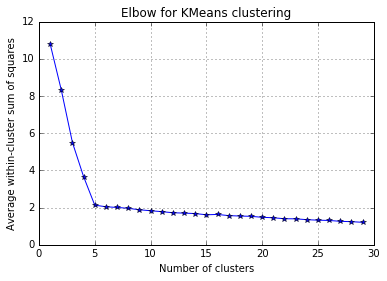

In [14]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K,k_opt=2):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.

    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    centroids = [k.cluster_centers_ for k in KM]

    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss

    kIdx = 10-1

    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
#     ax.plot(K[k_opt], avgWithinSS[k_opt], marker='o', markersize=12,
#             markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
elbow(data1, range(1,30))

#### 3. Use K-means to cluster the data1 by the proper number of clusters k you found and report your result. (5 pts) 

In [24]:
rr=KMeans(n_clusters=5).fit(data1)
rr.labels_

array([3, 2, 1, 1, 3, 1, 0, 4, 2, 4, 3, 0, 2, 3, 0, 4, 0, 3, 2, 0, 2, 3, 4,
       4, 3, 0, 0, 4, 4, 0, 2, 2, 0, 3, 2, 2, 0, 1, 2, 4, 3, 1, 4, 4, 0, 1,
       2, 1, 1, 4, 2, 0, 0, 4, 1, 3, 3, 2, 3, 1, 4, 3, 0, 2, 1, 3, 3, 3, 4,
       2, 3, 0, 1, 1, 1, 2, 2, 4, 0, 2, 2, 1, 0, 4, 1, 4, 4, 4, 3, 1, 1, 1,
       1, 3, 0, 3, 0, 4, 2, 0], dtype=int32)

#### 4.  Visualize the clustering result. Please use the plot from part 1 and color the points by the new labels (the clustering results). (5 pts)

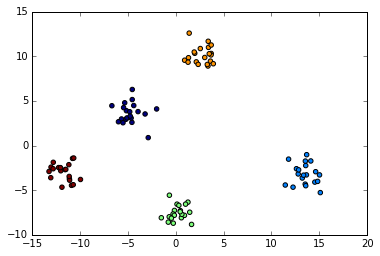

In [25]:
plt.scatter(Xproj[:,0],Xproj[:,1],c=rr.labels_)
plt.show()

#### 5. Use Guassian Mixture model instead of K-means with the same k and repeat the part 3 and 4. (10 pts)

In [34]:
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=5)
res1=gm.fit(data1).predict(data1)
res1

array([2, 0, 3, 3, 2, 3, 1, 4, 0, 4, 2, 1, 0, 2, 1, 4, 1, 2, 0, 1, 0, 2, 4,
       4, 2, 1, 1, 4, 4, 1, 0, 0, 1, 2, 0, 0, 1, 3, 0, 4, 2, 3, 4, 4, 1, 3,
       0, 3, 3, 4, 0, 1, 1, 4, 3, 2, 2, 0, 2, 3, 4, 2, 1, 0, 3, 2, 2, 2, 4,
       0, 2, 1, 3, 3, 3, 0, 0, 4, 1, 0, 0, 3, 1, 4, 3, 4, 4, 4, 2, 3, 3, 3,
       3, 2, 1, 2, 1, 4, 0, 1])

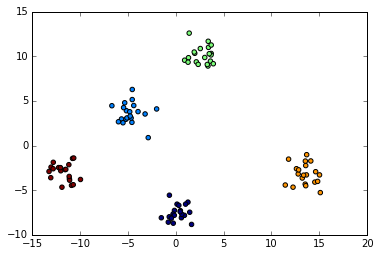

In [36]:
plt.scatter(Xproj[:,0],Xproj[:,1],c=res1)
plt.show()

## Question 2 : (30 pts)

This homework assignment concerns NYPD police stops in New York City in the years 
2011-2012 where the suspected crime was CPW (criminal possession of a weapon).  You can 
read more about these stops at 

https://en.wikipedia.org/wiki/Terry_stop 

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City 

You are given 1,069 stop records in the file ‘original_with_duplicates_noid.csv’, but 
unfortunately technical errors have resulted in some exact duplicate records.  You know 
there are around 1,000 unique stops in the file (there may be slightly more or slightly 
fewer).   


In [39]:
data2=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/original_with_duplicates_noid.csv")
data2.head(3)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,False,False,False,black,27,medium,male,5.666667,180,...,False,False,False,False,False,False,False,Saturday,January,6
1,2011,False,False,False,asian,40,medium,male,6.166667,225,...,False,False,True,True,False,False,False,Friday,November,6
2,2012,False,False,False,black,20,medium,male,6.000000,200,...,False,False,False,False,False,False,False,Saturday,August,6



#### 1. Use a clustering technique of your choice to determine how many unique records there are. (15 pts)

#### 2. Check your work by looking for row-wise duplicates using any technique of your choice (this should be straightforward).  How well did your clustering technique perform?  (5 pts)

#### 3. Write a paragraph explaining what you did in parts a) and b)  (10 pts)

#### ( Any  creative application of clustering method with correct explanation and answer would be ok) 

In [41]:
# Factorize the data set.
# Transform the data set to factors for string terms:
data_temp=[]
for i in range(len(data2.T)): #Change for every columns one by one
    temp=data2.iloc[:,i]
    try:                      #change it to float if possible
        temp1=temp.apply(float)
        data_temp.append(list(temp1))
    except ValueError:
        temp1=pd.factorize(temp) #factorize it for strings if not possible
        data_temp.append(list(temp1[0]))
#Then, make it to Pandas Dataframe:
data_q1=pd.DataFrame(data_temp).T
data_q1.columns=data2.columns
data_q1.head()

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,5.666667,180.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,2011.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,6.166667,225.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0
2,2012.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,6.000000,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0
3,2011.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,5.916667,180.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
4,2011.0,0.0,0.0,0.0,0.0,33.0,1.0,0.0,5.666667,175.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0


In [42]:
#a) For finding duplicates, we calculate the score of accuracy. We stop when we get 0 distance. The only possible situation
#is that the number of unique observations is equal to the number of clusters..
import sklearn.cluster as cluster
for i in range(990,1100):
    est=cluster.KMeans(n_clusters=i)# claster=5
    est.fit(data_q1)
    print est.score(data_q1)
    if est.score(data_q1)==0:
        print("we get {} unique elements".format(i))
        break

-37.677083334
-31.1458333335
-25.1145833335
-19.100694444
-13.600694444
-8.56944444403
-4.01388888806
-0.0
we get 997 unique elements


In [44]:
#b) Check the unique observations.(pandas has a good function drop_duplicates to help us):
ans=len(data_q1.drop_duplicates(list(data_q1.columns)))
print("we get {} unique elements.").format(ans)

we get 997 unique elements.


#### c). 

For part a), I use est.score(data_q1) to find duplicates. But do not forget to factorize the "string" variables. When we reach the point when the score=0, we should get all the distinct points. The reason is that for all the clusters, we do not make any "mistakes". Of course, when you add the clustering number, you should get 0 too. For part b), it is just a function from pandas.  

### Question 3: 311 data (30 pts)

The 311 data is not new for us. Let us use the scaled 311 data for question 3.

Be careful! The first three columns are : zip code(zip_code), the average income(mean), and the average housing price(sale_price) 

#### 1. Use Kmeans clustering model to cluster NYC zip codes into FOUR clusters. The feature space is the scaled 311 complaints data (from "Adopt A Basket" to the end. Please do not include "mean" and "sale_price" ) as provided.  Report the number of zip codes in each clusters. (10 pts)

#### 2. Calculate the average income and average housing price for each cluster you get from part 1. (10 pts)

#### 3. Visulize the clustering result on the map (For this part you need to use the shapefiles of NY).  (10 pts)


### (For people who are using the old data set: )

In [249]:
data3=pd.read_csv("../Documents/www-users/ADS_Data/session07/HW4_Q3.csv").iloc[:,1:]
data3=data3.dropna()
data3.index=range(len(data3))
# Your data set should be like this one after you drop duplicates and calculated average mean and sale_price by obs.
print data3.shape
data3.head()

(136, 182)


,zip,mean,sale_price,AGENCY,APPLIANCE,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,...,VACANT APARTMENT,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
0,10001,123112.0,1.950000e+06,0.0,0.000501,0.000000,0.001253,0.004762,0.000000,0.000251,...,0.0,0.000125,0.005263,0.001003,0.004511,0.001378,0.000000,0.046115,0.000000,0.000000
1,10003,139330.0,4.981025e+06,0.0,0.003208,0.000000,0.000740,0.004935,0.000247,0.000576,...,0.0,0.000000,0.003948,0.003043,0.010527,0.000658,0.000576,0.029114,0.000000,0.000000
2,10011,160936.0,1.150000e+07,0.0,0.003199,0.000000,0.000731,0.002925,0.000000,0.000640,...,0.0,0.000000,0.010145,0.001645,0.006215,0.001280,0.000274,0.041404,0.000091,0.000000
3,10014,162205.0,1.160757e+07,0.0,0.002390,0.000126,0.000880,0.003899,0.000000,0.000252,...,0.0,0.000000,0.006037,0.001132,0.006414,0.001006,0.000880,0.028173,0.000000,0.000000
4,10017,149723.0,5.200000e+06,0.0,0.000428,0.000000,0.000642,0.008137,0.000000,0.000214,...,0.0,0.000000,0.003426,0.000642,0.001927,0.001071,0.000857,0.032120,0.000000,0.000214


In [250]:
#1: 
fff=data3
data=fff.iloc[:,3:]
rr=KMeans(n_clusters=4).fit(data)
res=pd.concat((fff.zip,pd.DataFrame(rr.labels_)),axis=1)
list(res.groupby(0).size())

[52, 25, 44, 15]

In [251]:
#2: 
res2=pd.concat((res,fff.loc[:,["mean","sale_price"]]),axis=1)
# Average price for each group:
list(res2.groupby(0).sale_price.apply(lambda x: x.mean()))

[586930.23014463461, 598798.7644484, 519779.61713259073, 8276141.9982881341]

In [252]:
#Average income for each group:
list(res2.groupby(0)["mean"].apply(lambda x:x.mean()))

[61899.038461538461,
 48534.080000000002,
 79433.318181818177,
 164405.46666666667]

In [254]:
# Q3.
#3.
#import shapefile
import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

zipsf = shp.Reader('NY.shp')
zipsf_records=zipsf.records()
zipsf_shape=zipsf.shapeRecords()

#for plotting our result
def plot_on_map(result):
    
    x = {}
    for i in range(len(result)):
        key=result.loc[i,'zipcode']
        x[key]=result.loc[i,0]

    #x is a dictionary (zip codes vs values)
    cmap = plt.cm.spectral(np.linspace(0,1,max(x.values())+1))

    fig = plt.figure(figsize = (12,15)) 
    ax = fig.gca() 
    for s in range(0,len(zipsf_records)):
        z=int(zipsf_records[s][0])
        if z in x.keys(): 
            #from here
            k = x[z] 
            c=cmap[k][0:3]    
            shape=zipsf_shape[s]
            x_ = [i[0] for i in shape.shape.points[:]]
            y_ = [i[1] for i in shape.shape.points[:]]
            poly=Polygon(zip(x_,y_))
            #plt.fill(x,y,color=my_cmap[s])
            ax.add_patch(PolygonPatch(poly, fc=c, ec='k', alpha=0.5, zorder=2 ))

    ax.axis('scaled')
    plt.title("clustering result on map")

    import matplotlib.patches as mpatches
    clum_num=len(result.iloc[:,-1].unique())

    handles=[]
    for t in range(clum_num):
        locals()["patch_{}".format(t)] = mpatches.Patch(color=cmap[t][0:3] , label='cluster'+str(t+1))
        handles.append(locals()["patch_{}".format(t)])

    plt.legend(handles=handles,loc='upper left')
    plt.show()

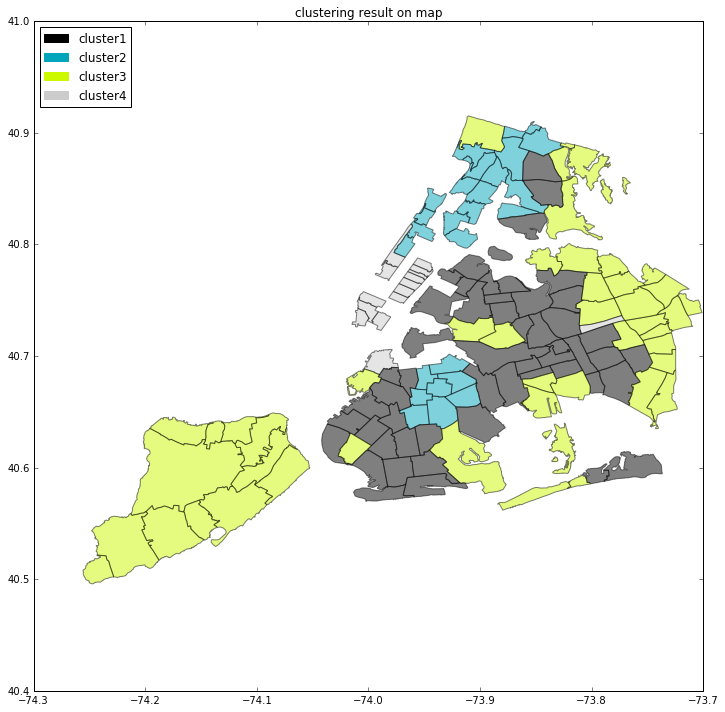

In [255]:
res3=res2.iloc[:,:2]
res3.columns=["zipcode",0]
plot_on_map(res3)

### (If you are using new data set:) 

In [256]:
data3=pd.read_csv("../Documents/www-users/ADS_Data/session07/HW4_Q3.csv").iloc[:,1:]
# Your data set should be like this one after you drop duplicates and calculated average mean and sale_price by obs.
print data3.shape
data3.head()

(178, 182)


,zip,mean,sale_price,AGENCY,APPLIANCE,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,...,VACANT APARTMENT,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
0,10001,123112.0,1950000.0,0.0,0.000501,0.000000,0.001253,0.004762,0.000000,0.000251,...,0.0,0.000125,0.005263,0.001003,0.004511,0.001378,0.000000,0.046115,0.000000,0.0
1,10002,NaN,NaN,0.0,0.004135,0.000081,0.000486,0.003730,0.000000,0.000811,...,0.0,0.000324,0.003892,0.004784,0.006649,0.000730,0.000243,0.030649,0.000000,0.0
2,10003,139330.0,4981025.0,0.0,0.003208,0.000000,0.000740,0.004935,0.000247,0.000576,...,0.0,0.000000,0.003948,0.003043,0.010527,0.000658,0.000576,0.029114,0.000000,0.0
3,10004,NaN,NaN,0.0,0.000000,0.000000,0.000620,0.001241,0.000000,0.001241,...,0.0,0.000000,0.008065,0.009305,0.000620,0.001241,0.000000,0.033499,0.001241,0.0
4,10005,NaN,NaN,0.0,0.000000,0.000000,0.001763,0.001763,0.000000,0.000000,...,0.0,0.000000,0.009401,0.000588,0.001763,0.000000,0.000000,0.022327,0.000000,0.0


In [258]:
#1: 
fff=data3
data=fff.iloc[:,3:]
rr=KMeans(n_clusters=4).fit(data)
res=pd.concat((fff.zip,pd.DataFrame(rr.labels_)),axis=1)
list(res.groupby(0).size())

[64, 41, 41, 32]

In [260]:
#2: 
res2=pd.concat((res,fff.loc[:,["mean","sale_price"]]),axis=1)
# Average price for each group:
list(res2.groupby(0).sale_price.apply(lambda x: x.mean()))

[590940.73582708614, 503055.59061536827, 598798.7644484, 8276141.9982881341]

In [262]:
#Average income for each group:
list(res2.groupby(0)["mean"].apply(lambda x:x.mean()))

[63670.586206896551,
 79497.947368421053,
 48534.080000000002,
 164405.46666666667]

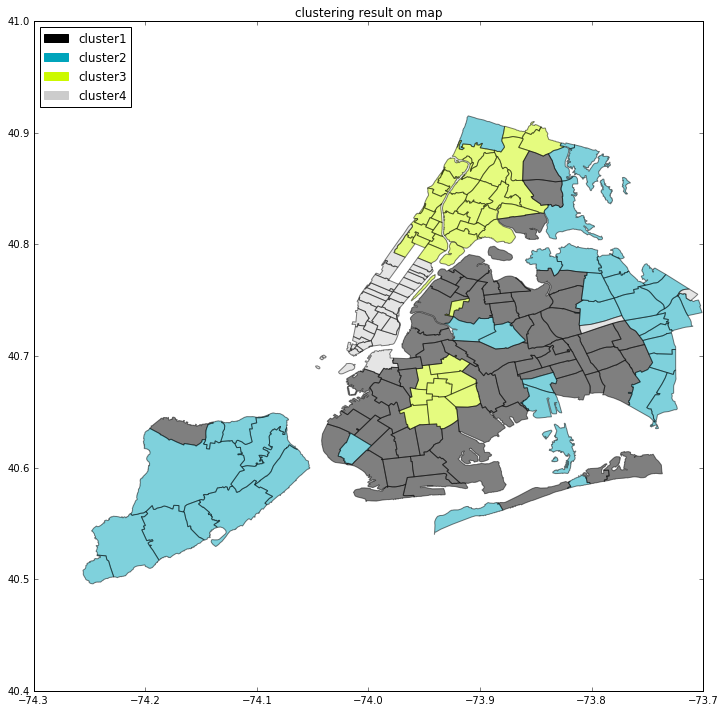

In [263]:
res3=res2.iloc[:,:2]
res3.columns=["zipcode",0]
plot_on_map(res3)

#### Bonus question. (30 pts)
Continue from Question 2:

You are given 1,100 stop records in the file ‘original_with_errors_noid.csv’, but 
unfortunately technical errors have resulted in some almost duplicate records (that is, 
there are some records that are duplicates of others except for slight variations in two 
features).  You know there are around 1,000 unique stops in the file (there may be 
slightly more or slightly fewer). 



In [266]:
data4=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/original_with_errors_noid.csv")
data4.head(3)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2011,False,False,False,black,20,heavy,male,5.500000,200,...,False,False,True,False,False,False,False,Wednesday,November,4
1,2012,False,False,False,black,24,medium,male,5.666667,155,...,False,False,True,False,False,False,False,Monday,August,6
2,2011,False,False,False,black,47,heavy,male,6.000000,245,...,False,True,True,True,False,False,False,Saturday,January,4


#### 1. Which are the two features where errors were introduced? (15 pts) 

#### 2. How many unique records there are? (10 pts)

#### 3. Write a paragraph explaining what you did. (5 pts)

#### This is an open question, so any right answer with proper explanation should be fine. 

In [268]:
#Facotrize data:
# Transform the data set to factors for string terms:
data_temp=[]
for i in range(len(data4.T)): #Change for every columns one by one
    temp=data4.iloc[:,i]
    try:                      #change it to float if possible
        temp1=temp.apply(float)
        data_temp.append(list(temp1))
    except ValueError:
        temp1=pd.factorize(temp) #factorize it for strings if not possible
        data_temp.append(list(temp1[0]))
#Then, make it to Pandas Dataframe:
data_q2=pd.DataFrame(data_temp).T
data_q2.columns=data2.columns
data_q2.shape

(1100, 39)

In [272]:
#Let's scale the data. Why we need to scale the data for sure??? Or you could not find it by the following way.
from sklearn.preprocessing import scale
data_q2_s=pd.DataFrame(scale(data_q2))
data_q2_s.columns=data_q2.columns

In [273]:
#I try to omit one column every time, and report the KMeans scores. I assume that if I remove error column, the
#score should be much lower. The reason is that duplicated observations exist.:
for i in range(len(data_q2_s.T)):
    temp=list(data_q2_s)
    temp.remove(temp[i])
    GM=cluster.KMeans(n_clusters=1000)
    GM.fit(data_q2_s.loc[:,temp])
    print GM.score(data_q2_s.loc[:,temp])

-8.05467149651
-8.10375445662
-8.10375445662
-8.17519206051
-8.10375445662
-4.1005292115
-8.15098148072
-8.10375445662
-8.21057268839
-3.42900498651
-8.17519206051
-8.21057268839
-8.10375445662
-8.21057268839
-8.17519206051
-8.10375445662
-8.18828544579
-8.21057268839
-8.10375445662
-8.07555628435
-8.10375445662
-8.10375445662
-8.10375445662
-8.22366607368
-8.25779971248
-8.10375445662
-8.21057268839
-8.10375445662
-8.10375445662
-8.10375445662
-8.10375445662
-8.18828544579
-8.10375445662
-8.10375445662
-8.10375445662
-8.10375445662
-8.0812612064
-8.10375445662
-8.17519206051


In [274]:
print("From the result above, we know that the error columns are:{} and {}".format(list(data_q2.columns)[5],list(data_q2.columns)[9]))

From the result above, we know that the error columns are:suspect.age and suspect.weight


In [283]:
#2
len((data_q2.T[~data_q2.columns.isin(["suspect.age","suspect.weight"])].T).drop_duplicates())

997

### 3.

So the whole story is about q1. If you solved q1, q2 is very easy. 

For this q1, please make sure that you understand the part one of q2. Why we get score=0 when we set the number of clusters equal to the number of unique records. Now we know that for thoes duplicates, there are two columns of them are slightly different. In this case, simple function .drop_duplicates() should not work. The idea is, if we do not have thoes two columns, we should get 0 when k is higher than number of duplicates. What if we have one columns, the error score should be higher than 0, but it should be lower than when we include both two column. Therefore, we remove columns one by one, and print out the score. Two should be very less than the others. However, if we do not scale the data, we cannot do this way. Why? Think about if the column with mistake has very small values...